In [1]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

# Um die Qualität der erzeugten Bilder zu erhöhen:
plt.rcParams['figure.dpi'] = 400
plt.rcParams['savefig.dpi'] = 400

Zuerst lesen wir das Bild der Kalibrierplatte ein:

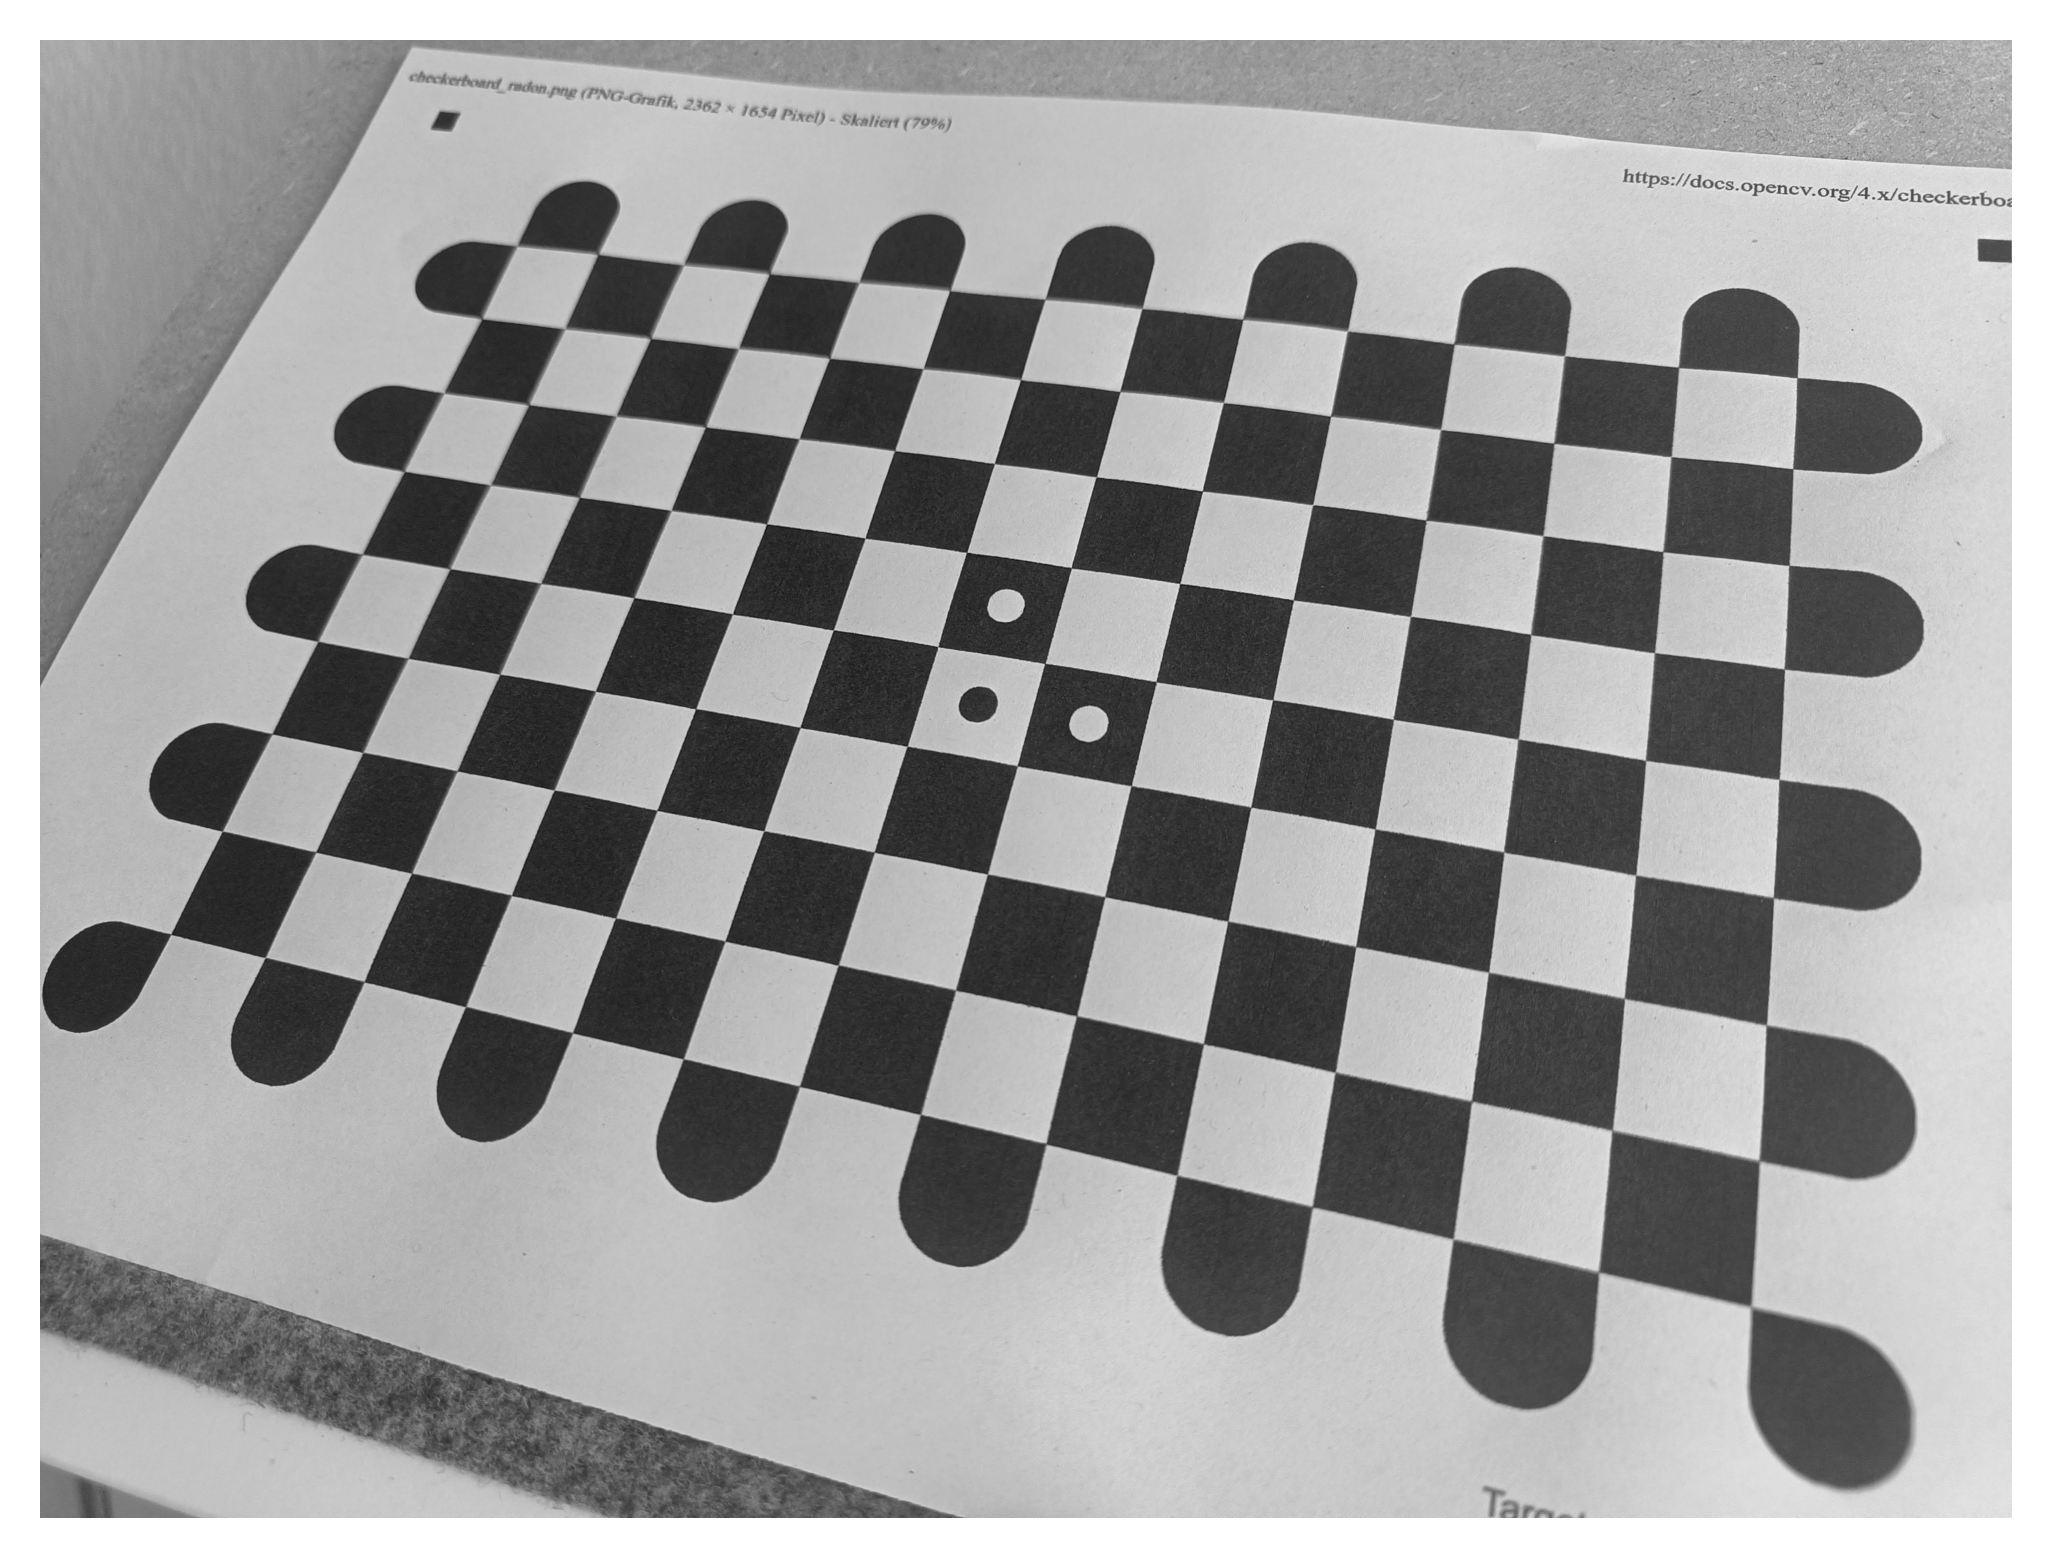

In [2]:
img = cv.imread("/workspaces/WASD/2D_Machine_Vision/blatt4/calibration_plate.jpg")
img_gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)

plt.imshow(img_gray, cmap="gray")
plt.axis('off')
plt.show()

Nun legen wir die Objektpunkte, also die bekannten Punkte auf der Kalibrierplatte fest. Hierbei legen wir das Weltkoordinatensystem in eine Ecke des Kalibriermusters, sodass alle zu erkennenden Punkte darauf in der xy-Ebene (mit z=0) liegen. Die Quadrate des Musters haben eine größe von 15.8mm * 15.8mm und erzeugen 14*9 innere Punkte. Somit ergeben sich die Koordinaten (0, 0, 0), (0, 0.0158, 0), (0.0158, 0, 0), (0.0158, 0.0158, 0), ...

In [ ]:
object_points = np.zeros((14*9,3), np.float32)
# TODO: Füllen Sie object_points. Dies geht mit numpy oder direkt mit Python.
rows=9
colums=14
square_size=0.0158
object_points=np.zeros((rows*colums,3),np.float32)
object_points[:, :2] = np.mgrid[0:colums, 0:rows].T.reshape(-1, 2)
object_points=object_points*square_size


Objektpunkte Shape: (126, 3)

Erste 5 Punkte:
[[0.     0.     0.    ]
 [0.0158 0.     0.    ]
 [0.0316 0.     0.    ]
 [0.0474 0.     0.    ]
 [0.0632 0.     0.    ]]


Nun verwenden wir cv.findChessboardCornersSB um diese Punkte im Bild zu finden:

In [ ]:
success, corners = cv.findChessboardCornersSB(img_gray,(colums,rows),None)
 

Wenn das Muster gefunden wurde stellen wir dieses dar:

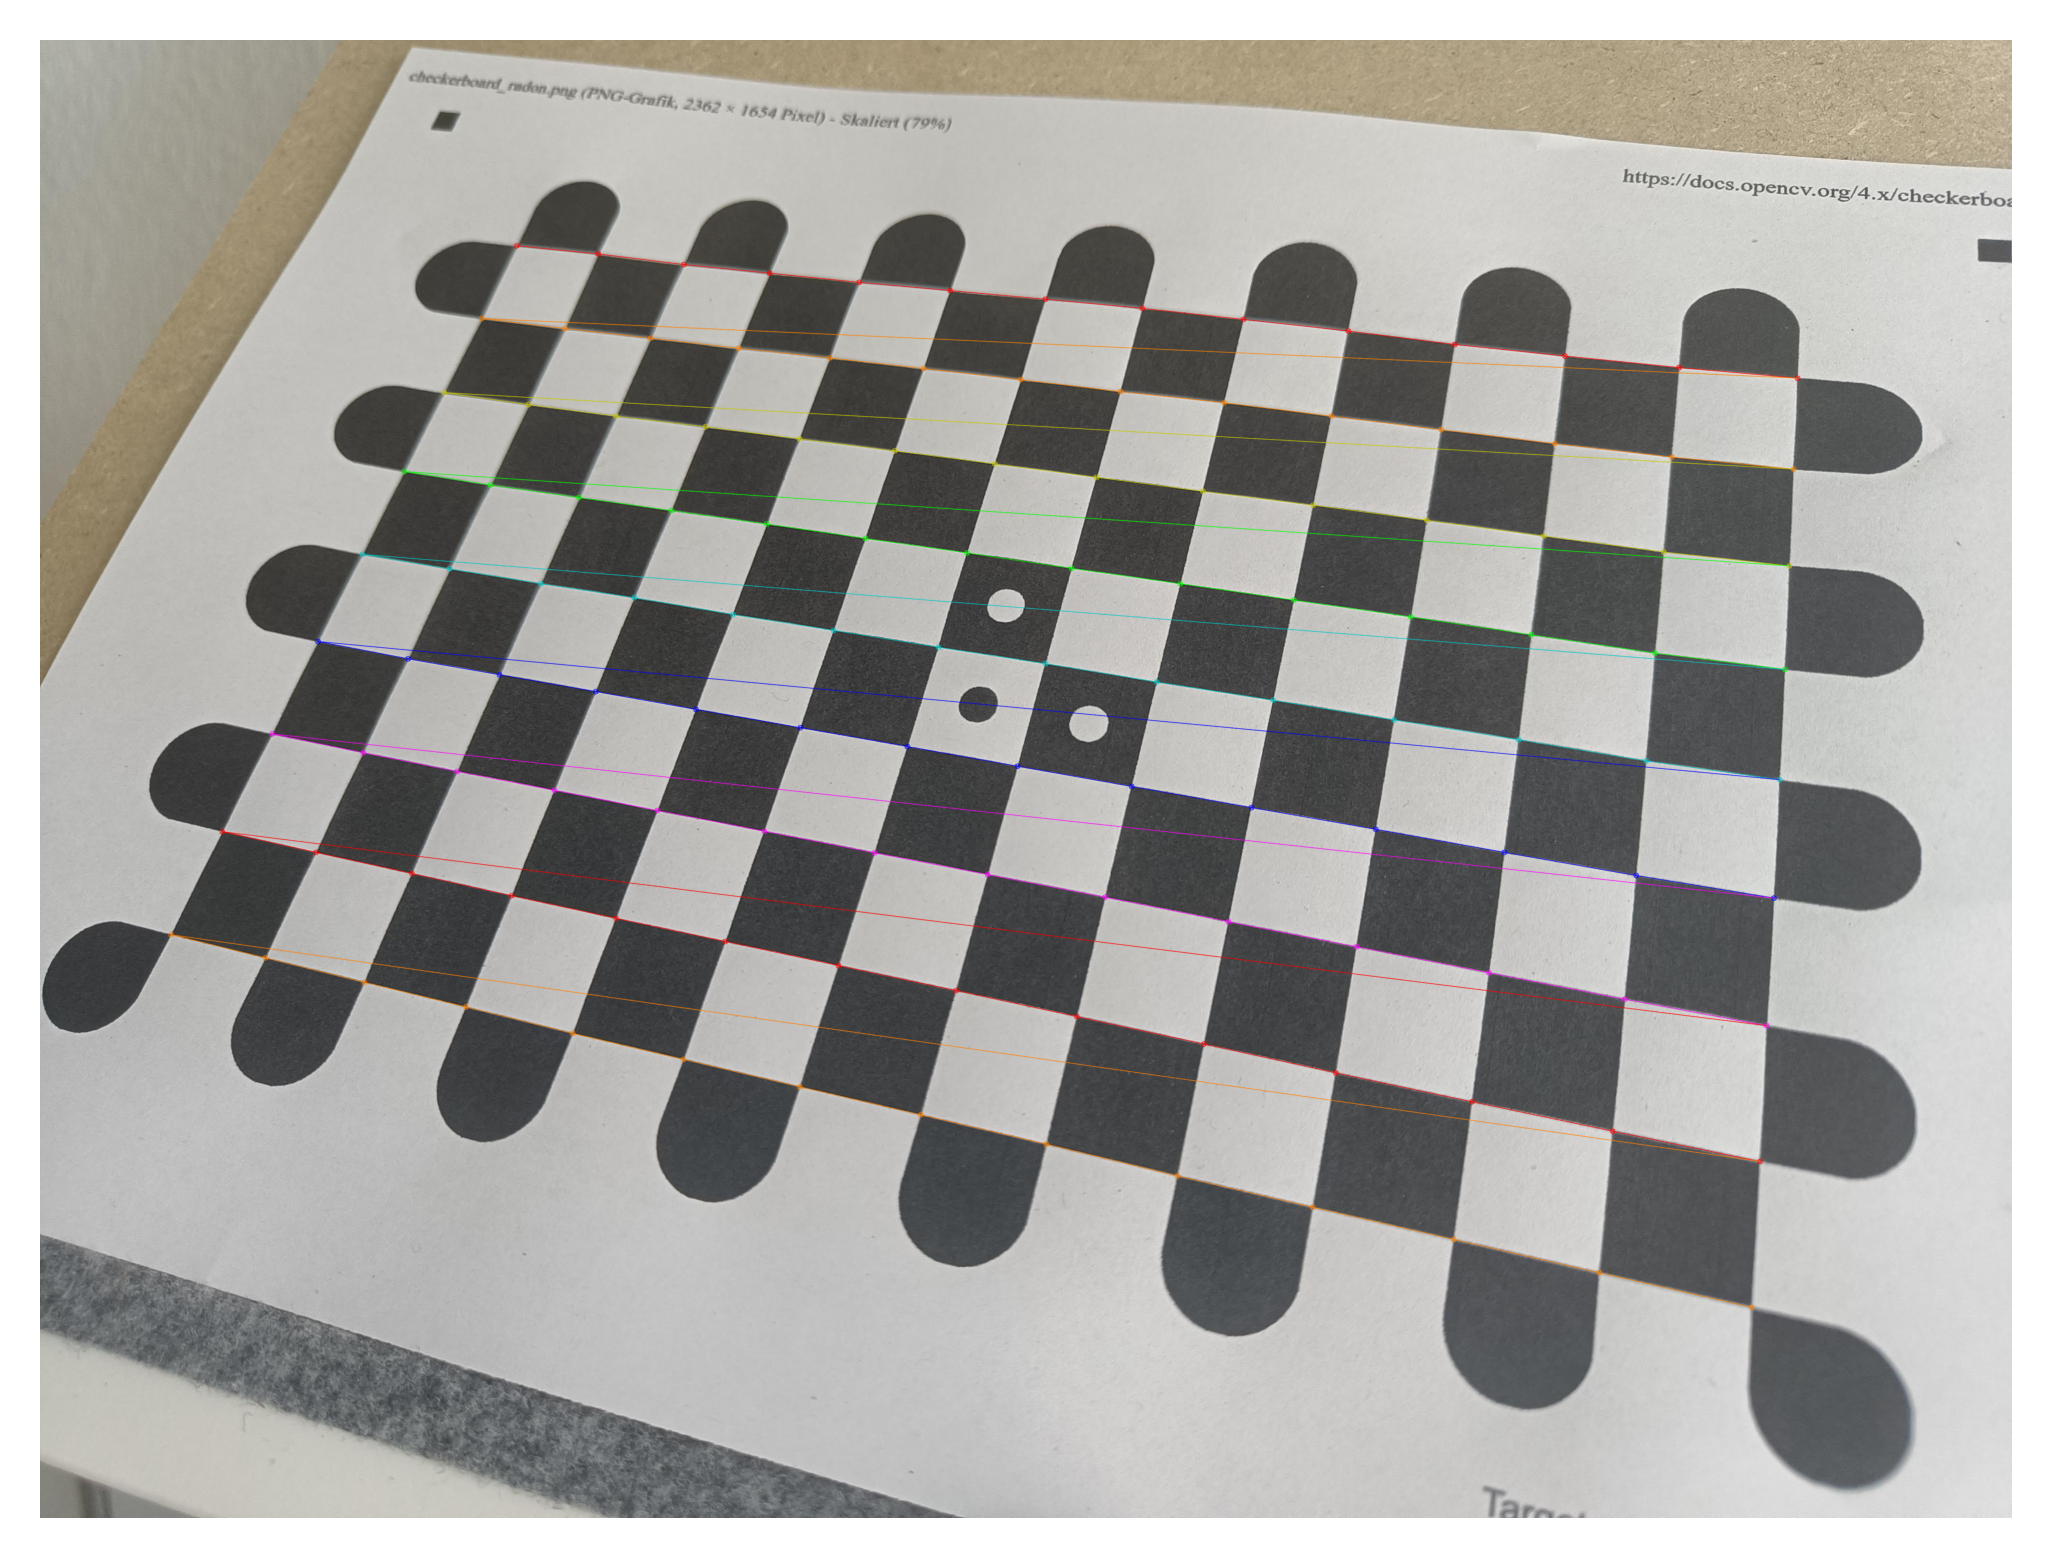

In [5]:
if success:
    cv.drawChessboardCorners(img, (14, 9), corners, True)
    plt.imshow(cv.cvtColor(img, cv.COLOR_BGR2RGB))
    plt.axis('off')
    plt.show()
else:
    print("Pattern not found.")

Mit den gefundenen Punkten im Bild sowie den bekannten 3D Objektpunkten können wir die Kameramatrix mittels cv.calibrateCamera bestimmen:

In [ ]:
calib_success, camera_matrix, distortion_param, rotation_vectors, translation_vectors = None # TODO: Kalibrieren Sie die Kamera
print(camera_matrix) # Intrinsische Kameramatrix
print(distortion_param) # Verzeichnungsparameter
print(rotation_vectors[0], translation_vectors[0]) # Extrinsische Parameter (Rotation und Translation vom Objekt-/Welt- zum Kamerakoordinatensystem)

Wir können den sogenannten Reprojektionsfehler, also die distortion_paramanz der ins Bild projizierten (mittels cv.projectPoints) Objektpunkte von den detektierten Ecken im Bild bestimmen:

In [ ]:
mean_error = 0
reprojected_corners, _ = None # TODO: Projizieren Sie die Objektpunkte zurück in das Bild
mean_error = cv.norm(corners, reprojected_corners, cv.NORM_L2)/len(reprojected_corners)
print("Reprojektionsfehler: {}".format(mean_error/len(object_points)))


Zum schluss können wir mittels cv.undistort das Bild entzerren um die Verzeichnung zu entfernen.

In [ ]:
undistorted_image = None # TODO: Entzerren Sie das Eingabebild mit der Kameramatrix und den Verzeichnungsparametern.

plt.subplot(1, 2, 1)
plt.imshow(cv.cvtColor(img, cv.COLOR_BGR2RGB))
plt.axis('off')
plt.subplot(1, 2, 2)
plt.imshow(cv.cvtColor(undistorted_image, cv.COLOR_BGR2RGB))
plt.axis('off')
plt.show()